In [1]:
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def evaluate(model, X_test_features, y_test):
    y_pred = model.predict(X_test_features)
    accuracy_test = sklearn.metrics.accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"Test Accuracy: {accuracy_test}")
    print(f'Mean Squared Error: {mse:.2f}')

    # Confusion Matrix
    cm = confusion_matrix(y_pred, y_test)
    class_labels = ['NORMAL', 'PNEUMONIA']
    
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix For SVM - Wavelet')
    plt.show()

    # Classification Report
    report = classification_report(y_test, y_pred, target_names=class_labels, zero_division=1)
    print(report)


In [3]:
X_train_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/Wavelet/X_train_features.npy"
X_val_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/Wavelet/X_val_features.npy"
X_test_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/Wavelet/X_test_features.npy"
y_train_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/Wavelet/y_train.npy"
y_val_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/Wavelet/y_val.npy"
y_test_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/Wavelet/y_test.npy"

In [4]:
# load features
X_train_features = np.load(X_train_features_dir)
X_val_features = np.load(X_val_features_dir)
X_test_features = np.load(X_test_features_dir)

y_train = np.load(y_train_dir)
y_val = np.load(y_val_dir)
y_test = np.load(y_test_dir)

In [5]:
# Define classifier
svm_model = SVC(kernel='rbf',random_state=42)

### Without Feature Reduction

In [6]:
# Make predictions on the val set
svm_model.fit(X_train_features, y_train)
y_pred_val = svm_model.predict(X_val_features)

# Evaluate the model on the test set
accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)

print(f"Validation Accuracy: {accuracy_val}")
print(f'Mean Squared Error: {mse:.2f}')

Validation Accuracy: 0.5
Mean Squared Error: 0.50


Test Accuracy: 0.375
Mean Squared Error: 0.62


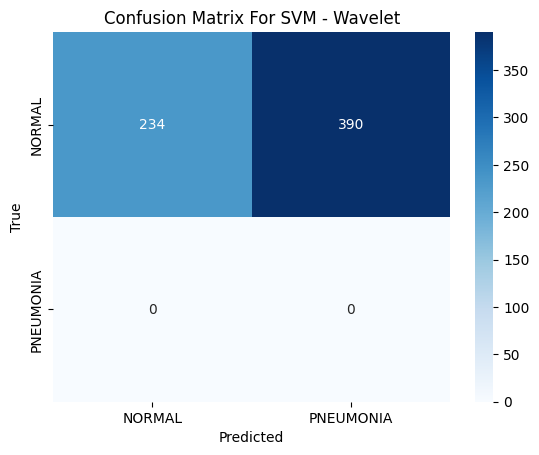

              precision    recall  f1-score   support

      NORMAL       0.38      1.00      0.55       234
   PNEUMONIA       1.00      0.00      0.00       390

    accuracy                           0.38       624
   macro avg       0.69      0.50      0.27       624
weighted avg       0.77      0.38      0.20       624



In [7]:
# Evalutaing the model on the test set
evaluate(svm_model, X_test_features, y_test)

### LDA

In [8]:
# Standardize the features (important for LDA)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_features)
X_val_std = scaler.transform(X_val_features)
X_test_std = scaler.transform(X_test_features)

In [9]:
lda = LinearDiscriminantAnalysis(n_components=1)  # Set the desired number of components
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_val_lda = lda.transform(X_val_std)
X_test_lda = lda.transform(X_test_std)

In [10]:
# Make predictions on the val set
svm_model.fit(X_train_lda, y_train)
y_pred_val = svm_model.predict(X_val_lda)

# Evaluate the model on the test set
accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)

print(f"Validation Accuracy: {accuracy_val}")
print(f'Mean Squared Error: {mse:.2f}')

Validation Accuracy: 0.5
Mean Squared Error: 0.50


Test Accuracy: 0.375
Mean Squared Error: 0.62


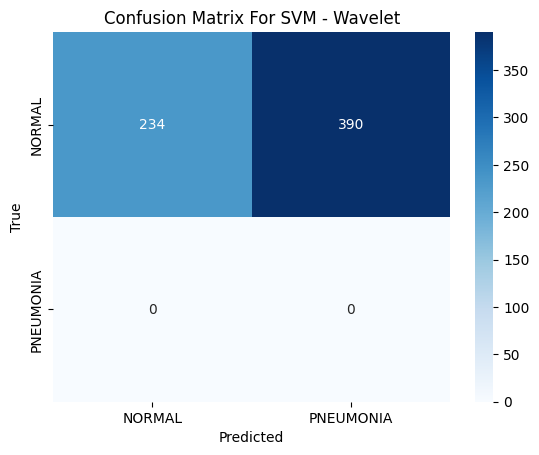

              precision    recall  f1-score   support

      NORMAL       0.38      1.00      0.55       234
   PNEUMONIA       1.00      0.00      0.00       390

    accuracy                           0.38       624
   macro avg       0.69      0.50      0.27       624
weighted avg       0.77      0.38      0.20       624



In [11]:
# Evalutaing the model on the test set
evaluate(svm_model, X_test_lda, y_test)

### PCA

In [12]:
scaled_X_train = scaler.fit_transform(X_train_features)
scaled_X_val = scaler.transform(X_val_features)
scaled_X_test = scaler.transform(X_test_features)

n_components = 16
pca = PCA(n_components=n_components, random_state=42)

X_train_pca = pca.fit_transform(scaled_X_train)
X_val_pca = pca.fit_transform(scaled_X_val)
X_test_pca = pca.fit_transform(scaled_X_test)

In [13]:
# Make predictions on the val set
svm_model.fit(X_train_pca, y_train)
y_pred_val = svm_model.predict(X_val_pca)

# Evaluate the model on the test set
accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)

print(f"Validation Accuracy: {accuracy_val}")
print(f'Mean Squared Error: {mse:.2f}')

Validation Accuracy: 0.5625
Mean Squared Error: 0.44


Test Accuracy: 0.5689102564102564
Mean Squared Error: 0.43


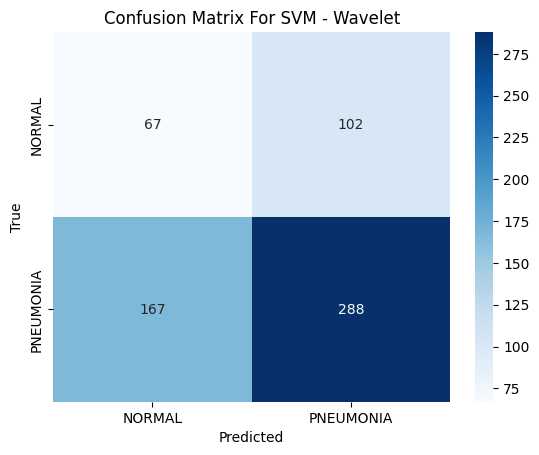

              precision    recall  f1-score   support

      NORMAL       0.40      0.29      0.33       234
   PNEUMONIA       0.63      0.74      0.68       390

    accuracy                           0.57       624
   macro avg       0.51      0.51      0.51       624
weighted avg       0.54      0.57      0.55       624



In [14]:
# Evalutaing the model on the test set
evaluate(svm_model, X_test_pca, y_test)

### T-SNE

In [15]:
# Fit the scaler on the training data and transform the training, validation, and test sets
X_train_scaled = scaler.fit_transform(X_train_features)
X_val_scaled = scaler.transform(X_val_features)
X_test_scaled = scaler.transform(X_test_features)

# Apply t-SNE to reduce the dimensionality to 2D for scaled data
tsne = TSNE(n_components=2,perplexity=5, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)
X_val_tsne = tsne.fit_transform(X_val_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)

In [16]:
# Make predictions on the val set
svm_model.fit(X_train_tsne, y_train)
y_pred_val = svm_model.predict(X_val_tsne)

# Evaluate the model on the test set
accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)

print(f"Validation Accuracy: {accuracy_val}")
print(f'Mean Squared Error: {mse:.2f}')

Validation Accuracy: 0.625
Mean Squared Error: 0.38


Test Accuracy: 0.6089743589743589
Mean Squared Error: 0.39


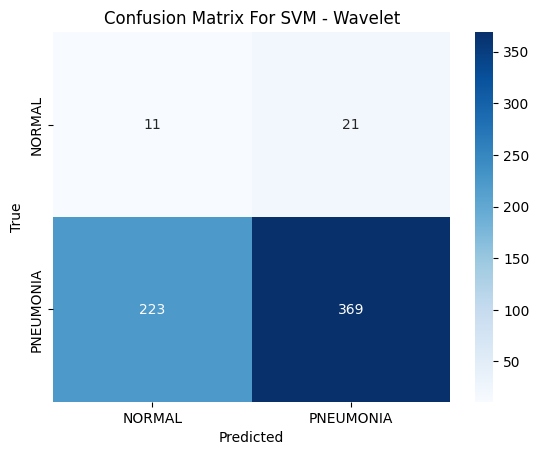

              precision    recall  f1-score   support

      NORMAL       0.34      0.05      0.08       234
   PNEUMONIA       0.62      0.95      0.75       390

    accuracy                           0.61       624
   macro avg       0.48      0.50      0.42       624
weighted avg       0.52      0.61      0.50       624



In [17]:
# Evalutaing the model on the test set
evaluate(svm_model, X_test_tsne, y_test)

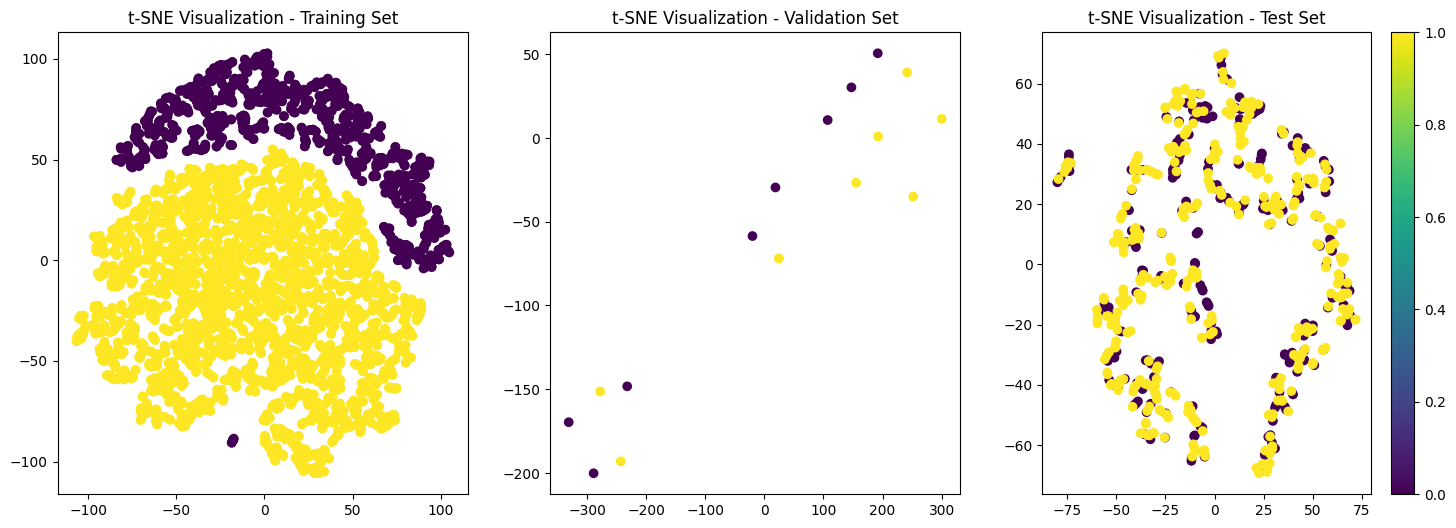

In [18]:
# Create scatter plots for training, validation, and test sets
# (similar to the previous example)
# Create scatter plots for training, validation, and test sets
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis')
plt.title('t-SNE Visualization - Training Set')

plt.subplot(1, 3, 2)
plt.scatter(X_val_tsne[:, 0], X_val_tsne[:, 1], c=y_val, cmap='viridis')
plt.title('t-SNE Visualization - Validation Set')

plt.subplot(1, 3, 3)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='viridis')
plt.title('t-SNE Visualization - Test Set')

plt.colorbar()
plt.show()